<a href="https://colab.research.google.com/github/Celinekimm/ML_Prediction/blob/main/SatisfactionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Read the dataset

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,Yes,3,6,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,Yes,7,5,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,Yes,6,7,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,Yes,3,6,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,No,8,7,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


# Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(1033, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

In [ ]:
print("---------Gender---------")
print(df['Gender'].value_counts())
print("---------Home Location---------")
print(df['Home Location'].value_counts())
print("---------Level of Education---------")
print(df['Level of Education'].value_counts())
print("---------Your level of satisfaction in Online Education---------")
print(df['Your level of satisfaction in Online Education'].value_counts())

---------Gender---------
Male      614
Female    419
Name: Gender, dtype: int64
---------Home Location---------
Urban    679
Rural    354
Name: Home Location, dtype: int64
---------Level of Education---------
Under Graduate    817
Post Graduate     129
School             87
Name: Level of Education, dtype: int64
---------Your level of satisfaction in Online Education---------
Average    541
Good       251
Bad        241
Name: Your level of satisfaction in Online Education, dtype: int64


# Visualising the Data

In [ ]:
df.corr()

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


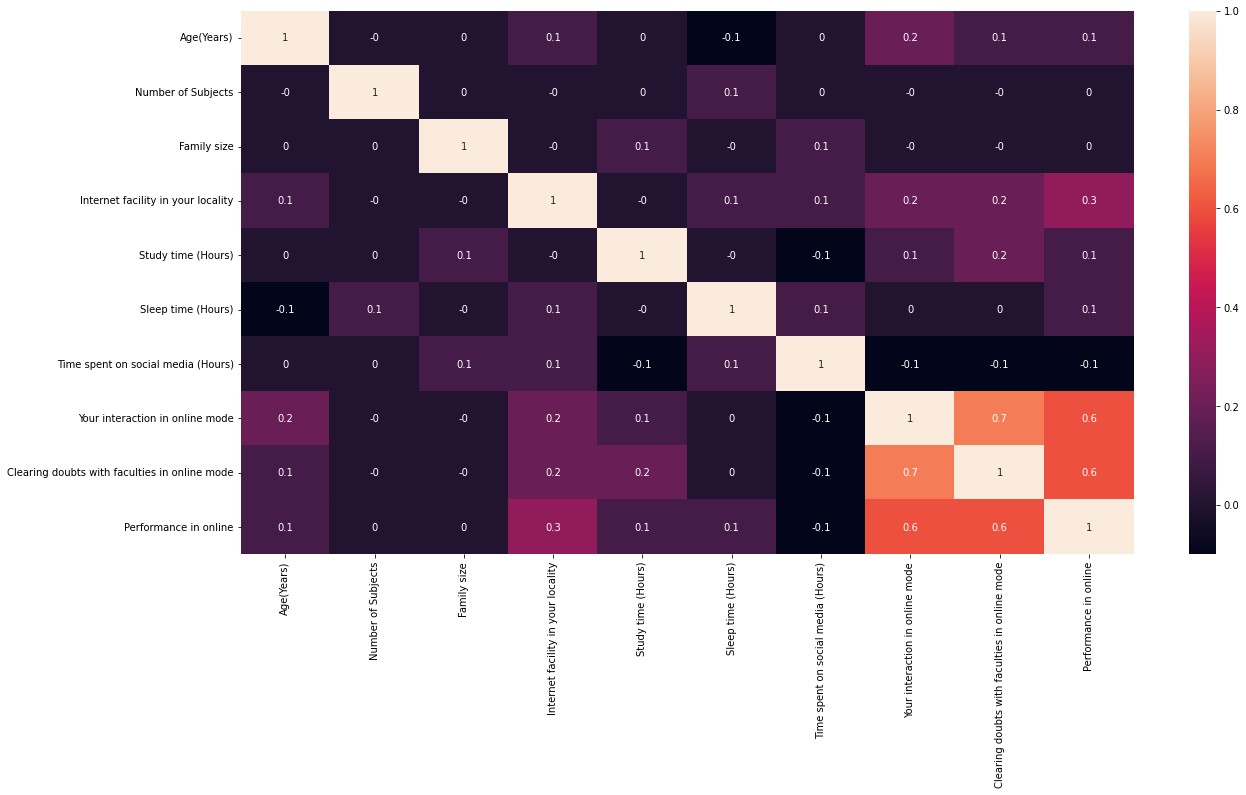

In [ ]:
# correlation matrix test
correlation_matrix = df.corr().round(1)
fig, ax = plt.subplots(figsize=(20,10))
# print a correlation heat map
sns.heatmap(correlation_matrix, annot=True)

### Visualization with Matplotlib
Faceted histograms

Text(3.799999999999997, 0.5, 'Count')

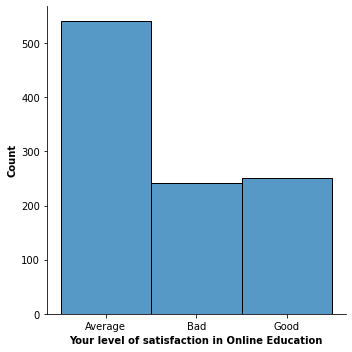

In [ ]:
# Displot chart
ax = sns.displot(data=df,x='Your level of satisfaction in Online Education')
ax.set_xticklabels(['Average','Bad','Good'])
plt.xlabel('Your level of satisfaction in Online Education',weight='bold')   
plt.ylabel('Count',weight='bold',fontsize='10')   

In [ ]:
df['Your level of satisfaction in Online Education'].value_counts(normalize=True)

Average    0.523717
Good       0.242982
Bad        0.233301
Name: Your level of satisfaction in Online Education, dtype: float64

Source by O'REILLY (https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html)

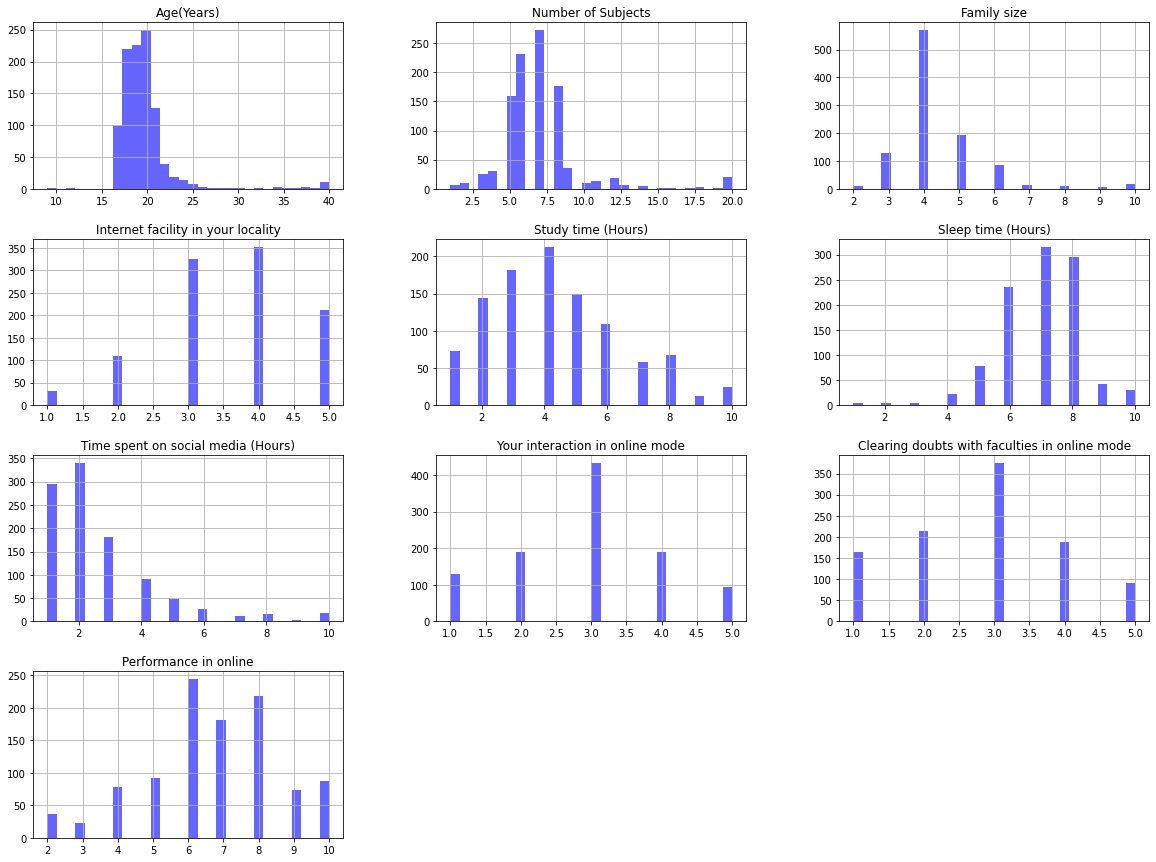

In [ ]:
# Histogram
df.hist(bins=30, figsize=(20,15), color='b', alpha=0.6)
plt.show()

Plotting distribution of Performance in online
Source by : https://github.com/abulashour/customer_satisfaction/blob/main/customer_satisfaction.ipynb

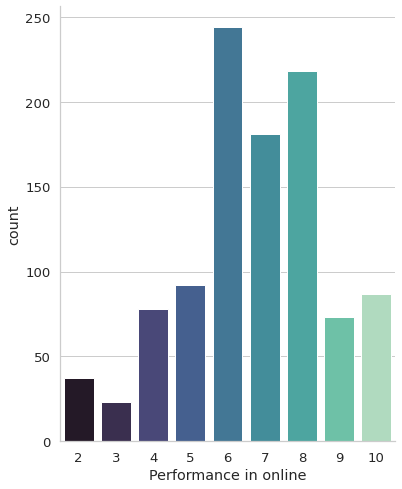

In [ ]:
#plotting distribution of Performance in online
sns.set(style='whitegrid',font_scale=1.2)
fig = plt.figure(figsize=[6,8])
ax = sns.countplot(data=df,x='Performance in online',palette='mako')
sns.despine()

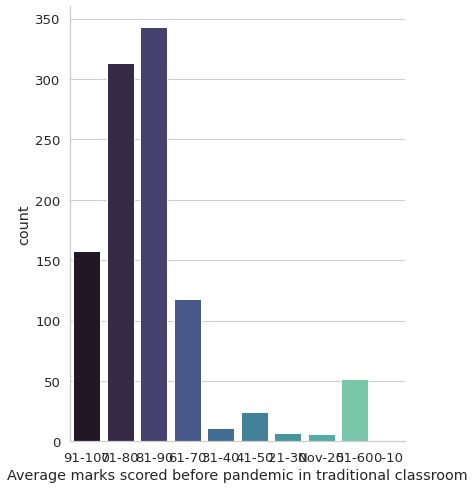

In [ ]:
#plotting distribution of Average marks scored before pandemic in traditional classroom
sns.set(style='whitegrid',font_scale=1.2)
fig = plt.figure(figsize=[6,8])
ax = sns.countplot(data=df,x='Average marks scored before pandemic in traditional classroom',palette='mako')
sns.despine()

# Data cleaning and feature engineering

In [ ]:
# Drop unnecessary columns
df = df.drop(['Gender', 'Home Location', 'Age(Years)', 'Device type used to attend classes', 'Family size', 'Are you involved in any sports?', 'Sleep time (Hours)', 'Interested in Gaming?', 'Time spent on social media (Hours)', 'Have separate room for studying?'], axis = 1)

In [ ]:
# Rename the column
df = df.rename(columns={'Level of Education' : 'education',  'Device type used to attend classes' : 'device', 
                        'Number of Subjects' : 'no.subjects', 'Economic status' : 'economic',  
                        'Do elderly people monitor you?' : 'monitoring', 'Study time (Hours)' : 'studytime', 
                        'Internet facility in your locality' : 'internet', 'Engaged in group studies?' : 'groupstudies', 
                        'Average marks scored before pandemic in traditional classroom' : 'averagescored', 
                        'Your interaction in online mode' : 'interaction', 'Clearing doubts with faculties in online mode' : 'dobuts',
                        'Interested in?' : 'interesting', 'Performance in online' :'performance',
                        'Your level of satisfaction in Online Education' :'satisfaction' })

In [ ]:
# Categorical variable encoding
df['education'] = df['education'].map({'School':0, 'Under Graduate':1,'Post Graduate':2})
df['economic'] = df['economic'].map({'Poor':0, 'Middle Class':1,'Rich':2})
df['monitoring'] = df['monitoring'].map({'No':0, 'no':0, 'yes':1, 'Yes':1})
df['groupstudies'] = df['groupstudies'].map({'No':0, 'no':0, 'yes':1, 'Yes':1})
df['interesting'] = df['interesting'].map({'Theory':0, 'Practical':1, 'Both':2})
df['satisfaction'] = df['satisfaction'].map({'Bad':0, 'Average':1, 'Good':2})

In [ ]:
avg = {'91-100':10,'81-90':9, '71-80':8,"61-70":7, '51-60':6, '41-50':5, '31-40':4, '21-30':3, 'Nov-20':2, '0-10':1}
df['averagescored'] = df['averagescored'].replace(avg)

df.head()

,education,no.subjects,economic,internet,monitoring,studytime,groupstudies,averagescored,interaction,dobuts,interesting,performance,satisfaction
0,1,11,1,5,1,3,0,10,1,1,1,6,1
1,1,7,1,1,1,7,0,10,1,1,0,3,0
2,1,5,1,2,1,6,0,8,1,1,2,6,0
3,1,5,1,4,1,3,1,10,1,2,0,4,0
4,1,5,1,3,0,8,1,9,3,3,2,6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   education      1033 non-null   int64
 1   no.subjects    1033 non-null   int64
 2   economic       1033 non-null   int64
 3   internet       1033 non-null   int64
 4   monitoring     1033 non-null   int64
 5   studytime      1033 non-null   int64
 6   groupstudies   1033 non-null   int64
 7   averagescored  1033 non-null   int64
 8   interaction    1033 non-null   int64
 9   dobuts         1033 non-null   int64
 10  interesting    1033 non-null   int64
 11  performance    1033 non-null   int64
 12  satisfaction   1033 non-null   int64
dtypes: int64(13)
memory usage: 105.0 KB


In [ ]:
df.isnull().sum()

education        0
no.subjects      0
economic         0
internet         0
monitoring       0
studytime        0
groupstudies     0
averagescored    0
interaction      0
dobuts           0
interesting      0
performance      0
satisfaction     0
dtype: int64

## Label Encoder 
Encode features between 0 and n_classes-1.

Reference : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()
encoder.fit(df['education'])
df['education'] = encoder.transform(df['education'])

encoder = LabelEncoder()
encoder.fit(df['economic'])
df['economic'] = encoder.transform(df['economic'])

encoder = LabelEncoder()
encoder.fit(df['monitoring'])
df['monitoring'] = encoder.transform(df['monitoring'])

encoder = LabelEncoder()
encoder.fit(df['groupstudies'])
df['groupstudies'] = encoder.transform(df['groupstudies'])

encoder = LabelEncoder()
encoder.fit(df['averagescored'])
df['averagescored'] = encoder.transform(df['averagescored'])

encoder = LabelEncoder()
encoder.fit(df['interesting'])
df['interesting'] = encoder.transform(df['interesting'])

encoder = LabelEncoder()
encoder.fit(df['satisfaction'])
df['satisfaction'] = encoder.transform(df['satisfaction'])

## One Hot Encoder 
Encode categorical features as a one-hot numeric array.

In [ ]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(df)
enc.transform(df)
drop_enc = OneHotEncoder(drop='first').fit(df)
drop_enc.categories_

[array([0, 1, 2]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([0, 1, 2]),
 array([1, 2, 3, 4, 5]),
 array([0, 1]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5]),
 array([0, 1, 2]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([0, 1, 2])]

## Feature Preparation
Splitting the Dataset

In [ ]:
# Split the dateset into features and target 
feature = df.columns
X = df.drop(labels = ["satisfaction"], axis=1)
y = df['satisfaction']
features = df['satisfaction']

In [ ]:
#Split the Training Set and Test Set

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)
dataset = [(X_train, y_train), (X_test, y_test)]
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (826, 12), Test Data Shape (207, 12)


## Normalising Data
Scaling individual samples to have unit norm.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[-0.06095651 -0.71400246  0.05708072 ... -0.74728955  1.19181695
  -0.37578748]
 [-0.06095651  0.01681047  0.05708072 ...  0.12701805  1.19181695
  -0.37578748]
 [-0.06095651  4.76709451  0.05708072 ...  0.12701805  1.19181695
  -1.415655  ]
 ...
 [-2.25009043  1.11302986  0.05708072 ...  0.12701805 -0.1295801
  -0.89572124]
 [-0.06095651  1.47843633  0.05708072 ... -0.74728955  1.19181695
   1.70394757]
 [-0.06095651  4.76709451  0.05708072 ... -1.62159716 -0.1295801
   0.66408005]]


In [ ]:
# RobustScaler
scaler = RobustScaler()
scaler_df = pd.DataFrame(df)
df = scaler.fit_transform(scaler_df)

print(df)

[[ 0.   2.   0.  ...  0.  -0.5  0. ]
 [ 0.   0.   0.  ... -1.  -2.  -1. ]
 [ 0.  -1.   0.  ...  1.  -0.5 -1. ]
 ...
 [ 0.  -2.   0.  ... -1.  -0.5  0. ]
 [ 0.  -0.5  0.  ...  1.  -0.5  1. ]
 [ 0.  -0.5  0.  ...  0.   1.5  0. ]]


In [ ]:
# RobustScaler
scaler = RobustScaler()
scaler_df = pd.DataFrame(X_train)
y_scaler_df = pd.DataFrame(y_train)
X_train = scaler.fit_transform(scaler_df)
y_train = scaler.fit_transform(y_scaler_df)

print(X_train)
print(y_train)

## PCA (Principal Component Analysis)

Source by https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#pca = PCA()
#PCs = pca.fit_transform(X_train) 
PCs = pca.fit(X_train)
PCs_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_

array([2.48686898, 1.408519  ])

In [ ]:
ratio = pca.explained_variance_ratio_
ratio

array([0.20698819, 0.11723448])

# Machine Learning

## Linear Regression

Reference: 	
Burns, Samuel(2019), Python machine learning: machine learning and deep learning with Python, scikit-learn, TensorFlow : step-by-step tutorial for beginners

In [ ]:
# Create linear regression object
lin_model = LinearRegression()

# fit the model to the training data
lin_model_fit = lin_model.fit(X_train, y_train)

# predict the data
pred_y = lin_model.predict(X_test)

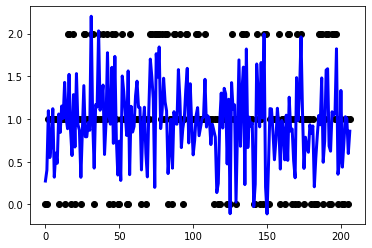

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(pred_y, color='blue', linewidth=3)

### Predciting

In [ ]:
pred_y = lin_model.predict(X_test)

In [ ]:
mul = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})
print(mul)

     Actual  Predicted
3         0   0.273675
367       0   0.401351
107       1   1.097003
809       1   0.548396
483       1   0.737742
..      ...        ...
191       0   0.713982
190       1   1.026809
6         1   1.007001
41        0   0.596244
612       1   0.857461

[207 rows x 2 columns]


### Evaluating the accuracy

In [ ]:
print("Intercept : ", lin_model.intercept_)

Intercept :  1.0084745762711864


In [ ]:
coeff = pd.DataFrame(lin_model_fit.coef_, X.columns, columns=['Coefficient'])
print(coeff)

               Coefficient
education        -0.042379
no.subjects      -0.014998
economic         -0.012156
internet          0.001283
monitoring       -0.025599
studytime        -0.003603
groupstudies     -0.035717
averagescored    -0.100003
interaction       0.166659
dobuts            0.150712
interesting      -0.054796
performance       0.163569


In [ ]:
import sklearn.metrics as metrics
r2 = r2_score(y_test, pred_y)

print('MAE:', metrics.mean_absolute_error(y_test, pred_y)) # MAE: Mean Absolut Error 
print('MSE:', metrics.mean_squared_error(y_test, pred_y)) # MSE: Mean Square Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)) # RMSE: Root Mean Squared Error 
print('R2{}'.format(r2))

SyntaxError: ignored

Grid Search

Grid search uses a ‘fit’ and ‘score’ methodology to determine the best parameter for a 
given model. The model to be tuned along with the parameters and their finite possible 
values is passed within GridSearchCV. The output signifies the parameter values on 
which the model will be best tuned.
To explained grid search, compiled Ridge regression.

Reference: Harron, Danish(2017), Python Machin Learning Case Studies

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
l2_model = Ridge(alpha=0.5, random_state=0).fit(X_train, y_train)

In [ ]:
pred = l2_model.predict(X_test)
print(pred)

[ 0.27402679  0.40160971  1.09705617  0.54853803  0.7377855   1.12081106
  0.31920631  0.60186157  0.48180207  1.05898759  0.84262262  1.15222898
  1.00749822  1.42913623  1.01688562  0.88636357  1.52308533  0.87114817
  0.57221652  1.28605761  0.67223511  1.53187968  0.93599453  0.86947551
  0.31755649  0.87322426  1.39113692  0.79257147  0.79238766  0.95906081
  0.86768978  2.2035856   0.97019029  0.42519975  1.16850473  1.14019861
  2.03233448  1.10314546  1.21811956  1.39763619  0.5849936   0.95125469
  1.77639331  1.04001696  0.93966638  1.60572537  0.71510579  1.73333618
  0.773038    0.34372067  0.74115505  0.28091858  1.50404459  1.32209049
  1.07592678  0.80753722  1.56329505  0.34814313  1.14880612  0.84751722
  0.91335306  1.27207976  1.44346217  1.13807197  1.1343299   0.40397601
  0.90935418  1.13848179  0.59565584  0.32219886  1.11818273  1.70188751
  1.49802127  1.23622279  0.1995342   1.76479938  1.49166332  1.84410249
  0.88798568  1.09613593  1.47785681  1.20046961  1

In [ ]:
print(np.round(l2_model.coef_, 5))

[-0.04233 -0.01499 -0.01216  0.00131 -0.02557 -0.00359 -0.03567 -0.09994
  0.1666   0.15069 -0.05478  0.1635 ]


In [ ]:
# print the performance metrics
print("Model performance")
print("--------------------------------------")
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print('R2 score is {}'.format(r2))
print('RMSE {}'.format(rmse))

Model performance
--------------------------------------
R2 score is 0.343754538224179
RMSE 0.5601059609225642


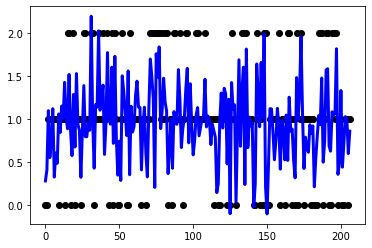

In [ ]:
alphas = np.arange(0.1,5,0.1)
model = Ridge()
cv = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

pred = cv.fit(X_train, y_train).predict(X_test)

plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(pred, color='blue', linewidth=3)

## L1 Regularisation (LASSO)

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
l1_model = Lasso(alpha=0.5)

# fit the model to the training data
l1_model_fit = l1_model.fit(X_train, y_train)

# predict the data
pred = l1_model_fit.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE {}'.format(rmse))
print('R2 score {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE 0.6914383906873229
R2 score -7.576277749810068e-05




## ElasticNet

### ElasticNet overcomes the limitations found in Lasso regression

In [ ]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# fit the model to the training data
enet_model_fit = enet_model.fit(X_train, y_train)

# predict the data
pred = enet_model_fit.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 0.6374493298812304
R2 score is 0.15000325706569972




ElasticNet - Grid Search

In [ ]:
cv = GridSearchCV(estimator=enet_model, param_grid=dict(alpha=alphas))

In [ ]:
y_pred = cv.fit(X_train, y_train).predict(X_test)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 0.5587036568530281
R2 score is 0.34703643040532306




## Decision tree

Reference: https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

r_tree = DecisionTreeRegressor() # fitting DecisionTree
r_tree.fit(X_train, y_train)
y_pred = r_tree.predict(X_test) #predicting the result on test data

In [ ]:
reg=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
reg

,Actual,Predicted
3,0,1.0
367,0,0.0
107,1,1.0
809,1,0.0
483,1,1.0
...,...,...
191,0,1.0
190,1,1.0
6,1,0.0
41,0,1.0


In [ ]:
# Evaluating the Algorithm

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5024154589371981
MSE: 0.5700483091787439
RMSE: 0.7550154363844119


In [ ]:
confusion_matrix(y_test, y_pred) #evaluating the model with confusion matrix

array([[27, 19,  2],
       [30, 57, 21],
       [ 5, 20, 26]])

## XGBoost

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn import preprocessing
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
preds

[11:58:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ 0.52808064,  0.15490338,  1.0960715 ,  0.56417245,  0.47807732,
        1.1894524 ,  0.41363126,  0.34432197,  0.52112967,  1.0183741 ,
        0.3986678 ,  1.145713  ,  0.9032377 ,  1.3311249 ,  1.0203612 ,
        0.5298829 ,  1.5393776 ,  0.5600029 ,  0.47685987,  0.98905456,
        0.62568915,  1.3444595 ,  1.0203521 ,  0.8933245 ,  0.4217136 ,
        0.593093  ,  1.3424338 ,  0.99959624,  0.852231  ,  0.8329599 ,
        0.9177525 ,  1.9155517 ,  1.0618918 ,  0.40265054,  1.2219089 ,
        1.3395131 ,  1.859144  ,  1.2484251 ,  1.1964648 ,  1.3911633 ,
        1.0520849 ,  1.0058968 ,  1.6039528 ,  1.2375655 ,  1.0254648 ,
        1.6630169 ,  0.78238213,  1.6230478 ,  1.0605693 ,  0.22067776,
        0.6351559 ,  0.49714673,  1.4572456 ,  1.3345466 ,  0.8836085 ,
        0.82200277,  1.6300212 ,  0.0900932 ,  1.3732806 ,  0.8357495 ,
        0.81098664,  1.2399063 ,  1.4357074 ,  1.1467507 ,  1.0626667 ,
        0.25653166,  0.5742327 ,  1.1154804 ,  0.39904982,  0.25

In [ ]:
print("Train dataset accuracy : {:.2f}".format(xg_reg.score(X_train, y_train)*100), '%')
print("Test dataset accuracy : {:.2f}".format(xg_reg.score(X_test, y_test)*100), '%')

Train dataset accuracy : 56.04 %
Test dataset accuracy : 30.04 %


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, 
                          max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg_fit = xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
xg_reg_fit.score(X_test, y_test)

[11:58:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.06451041389268974

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.668739


# Light-GBM

In [ ]:
lgm_model = lgb.LGBMClassifier()

In [ ]:
lgm_model_fit = lgm_model.fit(X_train,y_train)
preds = lgm_model.predict(X_test)
lgm_model.score(X_test, y_test)

0.6135265700483091

## Random Forest - Ensemble

Reference: 	
Burns, Samuel(2019), Python machine learning: machine learning and deep learning with Python, scikit-learn, TensorFlow : step-by-step tutorial for beginners

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_regressor = RandomForestRegressor(n_estimators=20, random_state=0)
rf_regressor.fit(X_train, y_train)
pred_y = rf_regressor.predict(X_test)

In [ ]:
# Evaluating algorithm performance

print('MAE:', metrics.mean_absolute_error(y_test, pred_y))
print('MSE:', metrics.mean_squared_error(y_test, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

MAE: 0.45410628019323673
MSE: 0.36698067632850245
RMSE: 0.6057893002756837


## Bagging (Bootstrap aggregating)

Reference : Grus, Joel (2019), Data science from scratch : first principles with Python

In [ ]:
from scipy.sparse.construct import random
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
print("Train dataset accuracy: {:.3f}".format(bagging.score(X_train, y_train)))
print("Test dataset accuracy: {:.3f}".format(bagging.score(X_test, y_test)))

Train dataset accuracy: 0.650
Test dataset accuracy: 0.691


In [ ]:
!pip install lightgbm
import lightgbm as lgb

# Hyperparameter tuning

# Gradient Boosting

Boosting is a non-linear flexible regression technique that helps increase the accuracy of trees by assigning more weights to wrong predictions. 

Reference: Harron, Danish(2017), Python Machin Learning Case Studies

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Train dataset accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test dataset accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Train dataset accuracy: 0.815
Test dataset accuracy: 0.633


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Train dataset accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test dataset accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

Train dataset accuracy: 0.655
Test dataset accuracy: 0.671


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


regr = GradientBoostingRegressor()

In [ ]:
y_pred = regr.fit(X_train, y_train).predict(X_test)

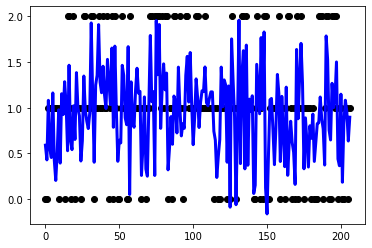

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue',
 linewidth=3)

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 0.5886141752203817
R2 score is 0.27525144654910705




  # Cross validation

  Reference: Guido, Sarah(2016) Introduction to Machine Learning with Python: A Guide for Data Scientists

### Regression model cross validation

In [ ]:
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, X_train, y_train)
print("cross validate score : ", scores)
print("cross validate mean: {:.2f}".format(scores.mean()))

cross validate score :  [0.65060241 0.63030303 0.62424242 0.63636364 0.61212121]
cross validate mean: 0.63


In [ ]:
res = cross_validate(logreg, X_train, y_train,
                     return_train_score=True)
display(res)

{'fit_time': array([0.01619434, 0.00884938, 0.00829887, 0.00795555, 0.00834942]),
 'score_time': array([0.00047255, 0.00040054, 0.00039029, 0.00038338, 0.00037694]),
 'test_score': array([0.65060241, 0.63030303, 0.62424242, 0.63636364, 0.61212121]),
 'train_score': array([0.6469697 , 0.6505295 , 0.64599092, 0.6505295 , 0.65506808])}

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

print("cross validate score: ", cross_val_score(logreg, X_train, y_train, cv=kfold))

cross validate score:  [0.62650602 0.66666667 0.66060606 0.6        0.59393939]


In [ ]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, X_train, y_train, cv=shuffle_split)
print("cross validate score : ", scores)

cross validate score :  [0.57627119 0.62227603 0.65375303 0.62227603 0.59806295 0.58837772
 0.64164649 0.59564165 0.62953995 0.60290557]


In [ ]:
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import RepeatedKFold

rskfold = RepeatedKFold(random_state=42)
scores = cross_val_score(logreg, X_train, y_train, cv=rskfold)

print("cross validate score: ", scores)
print("cross validate mean : {:.3f}".format(scores.mean()))

cross validate score:  [0.58433735 0.64242424 0.61212121 0.60606061 0.64848485 0.68072289
 0.63030303 0.58181818 0.64848485 0.60606061 0.58433735 0.60606061
 0.72121212 0.62424242 0.61818182 0.63253012 0.56363636 0.66666667
 0.64242424 0.64848485 0.64457831 0.63636364 0.64242424 0.63030303
 0.61212121 0.60240964 0.66060606 0.63636364 0.57575758 0.68484848
 0.60843373 0.64242424 0.65454545 0.65454545 0.59393939 0.60240964
 0.64242424 0.62424242 0.68484848 0.59393939 0.59638554 0.63636364
 0.60606061 0.63030303 0.65454545 0.62650602 0.64848485 0.63636364
 0.6        0.64242424]
cross validate mean : 0.629


### RandomForest model cross validation

In [ ]:
logreg = RandomForestClassifier()

scores = cross_val_score(logreg, X_train, y_train)
print("cross validate score : ", scores)
print("cross validate mean: {:.2f}".format(scores.mean()))

cross validate score :  [0.6686747  0.56969697 0.6        0.60606061 0.56969697]
cross validate mean: 0.60


In [ ]:
res = cross_validate(logreg, X_train, y_train,
                     return_train_score=True)
display(res)

{'fit_time': array([0.18308425, 0.18713069, 0.18604374, 0.17572045, 0.18434429]),
 'score_time': array([0.01335526, 0.01339269, 0.01409721, 0.01323199, 0.01361275]),
 'test_score': array([0.68072289, 0.55757576, 0.65454545, 0.60606061, 0.57575758]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

print("cross validate score: ", cross_val_score(logreg, X_train, y_train, cv=kfold))

cross validate score:  [0.63253012 0.59393939 0.59393939 0.61818182 0.58181818]


In [ ]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, X_train, y_train, cv=shuffle_split)
print("cross validate score : ", scores)

cross validate score :  [0.60048426 0.58353511 0.60532688 0.61743341 0.59806295 0.61743341
 0.58353511 0.59564165 0.57384988 0.58837772]


In [ ]:
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import RepeatedKFold

rskfold = RepeatedKFold(random_state=42)
scores = cross_val_score(logreg, X_train, y_train, cv=rskfold)

print("cross validate score: ", scores)
print("cross validate mean : {:.3f}".format(scores.mean()))

cross validate score:  [0.59638554 0.66666667 0.64242424 0.58181818 0.60606061 0.64457831
 0.63030303 0.61818182 0.58787879 0.62424242 0.62650602 0.6
 0.66666667 0.61212121 0.6        0.61445783 0.55151515 0.65454545
 0.58787879 0.61818182 0.64457831 0.60606061 0.56969697 0.63636364
 0.60606061 0.60843373 0.67272727 0.6        0.55757576 0.61818182
 0.60843373 0.61212121 0.58181818 0.65454545 0.56363636 0.64457831
 0.6        0.6        0.61212121 0.64848485 0.54819277 0.53939394
 0.61212121 0.63030303 0.64848485 0.57831325 0.63030303 0.61212121
 0.58787879 0.61818182]
cross validate mean : 0.612


# Algorithm Chains and Pipelines 
Most machine learning applications require not only the application of a single algorithm, but the chaining together of many different processing steps and machine learning models to improve the performance of prediction.

Reference: Andreas C. Müller, Sarah Guido (2019), Introduction to Machine Learning with Python

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
svm = SVC()

In [ ]:
# transform data
#X = StandardScaler().fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

scalers = scaler.fit(X_train)
svm.fit(X_train, y_train)
X_test_scaled = scaler.transform(X_test)
print(X_train)

[[0.5        0.21052632 0.5        ... 0.25       1.         0.5       ]
 [0.5        0.31578947 0.5        ... 0.5        1.         0.5       ]
 [0.5        1.         0.5        ... 0.5        1.         0.25      ]
 ...
 [0.         0.47368421 0.5        ... 0.5        0.5        0.375     ]
 [0.5        0.52631579 0.5        ... 0.25       1.         1.        ]
 [0.5        1.         0.5        ... 0.         0.5        0.75      ]]


In [ ]:
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.68


In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [ ]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.68


# Hyperparameter again - GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

svc_linear = SVC(kernel = "linear", random_state=777)
params = {'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} 

In [ ]:
param_grid = {"C" : [0.001, 0.01, 0.1, 1, 1, 25, 50, 100]}
grid_svc = GridSearchCV(svc_linear, param_grid=param_grid, cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=777),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1, 25, 50, 100]})

In [ ]:
best_param = grid_svc.best_params_
best_score = grid_svc.best_score_

result = pd.DataFrame(grid_svc.cv_results_["params"])
result["mean_test_score"] = grid_svc.cv_results_["mean_test_score"]
result.sort_values(by = "mean_test_score", ascending=False)
result

,C,mean_test_score
0,0.001,0.524213
1,0.010,0.610164
2,0.100,0.630741
3,1.000,0.635582
4,1.000,0.635582
5,25.000,0.634370
6,50.000,0.634370
7,100.000,0.634370
